In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set('paper',
        'white',
        rc={'font.size': 10,
            'axes.labelsize': 10,
            'legend.fontsize': 8,
            'axes.titlesize': 10,
            'xtick.labelsize': 8,
            'ytick.labelsize': 8,
            "pgf.rcfonts": False})

In [2]:
alpha_count = np.fromstring(
"""0 0 0 0 0 0 0 1 2 0 0 0 0 1 0 0 0 14 2 2 3 0 5 1 13 8 4 5 11 4 3 5 42
0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 3 0 2 1 0 0 0 1 3 6 4 1 6 1 0 2 5
0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 4 1 3 1 5 2 1 1 5 2 5 3 1 1 0 5 4
0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 2 1 2 3 2 3 1 4 2 2 0 3 3 2 3 7
0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 8 6 3 3 4 7 4 3 16 5 4 2 8 3 0 1 0
0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 8 4 9 8 6 7 6 21 4 2 1 9 1 2 2 2
0 0 0 0 0 0 0 0 0 1 1 1 2 0 0 1 5 15 14 12 12 12 13 2 13 6 3 3 6 0 3 2 1
0 0 0 0 0 0 0 0 0 0 0 0 3 2 1 1 12 23 24 25 40 49 48 17 22 13 6 4 5 2 0 2 9
0 0 0 0 0 0 1 1 2 1 0 8 6 23 24 19 5 344 166 111 172 152 128 66 152 26 15 17 16 4 6 6 23
0 0 0 0 1 0 0 0 2 4 3 16 10 15 18 22 32 188 135 110 160 145 110 82 42 9 11 4 5 1 2 2 2
1 0 0 1 0 5 2 2 6 8 16 25 43 52 71 87 79 679 461 391 507 301 239 58 84 20 12 7 19 2 1 5 32
0 0 0 2 0 2 5 7 4 27 68 165 258 233 403 702 1044 3646 2478 2120 1670 996 503 191 240 63 42 35 56 18 25 28 94
2 0 0 3 2 5 6 4 28 25 92 504 914 1455 3414 6443 12664 24505 14479 9440 7107 2762 1754 681 1009 248 199 134 240 97 65 122 503
0 2 1 3 1 2 3 6 21 34 131 667 1231 2830 7723 18508 79749 50313 28377 14766 6187 2259 1293 582 901 260 146 116 153 81 64 109 300
0 0 1 2 2 3 4 5 32 67 209 982 2016 4214 12447 36074 255940 165476 74261 18983 7568 2668 1782 611 1159 291 221 161 292 70 53 93 282
0 2 1 4 2 3 1 9 36 83 305 1293 2755 5834 15969 53386 401605 268278 47867 10721 4291 1448 821 337 824 175 140 88 168 35 33 35 165
0 1 1 1 2 3 3 5 9 33 134 1080 2589 9911 39536 98588 0 20306 3861 691 195 92 36 25 6 2 6 2 2 1 3 1 0
20 2 2 6 8 6 19 23 189 135 682 4964 12046 20868 73203 160306 43096 5840 2078 750 366 136 73 16 22 10 6 13 15 8 19 27 18
4 1 5 4 8 11 14 26 118 128 555 2990 6199 10673 39303 39671 10240 2823 1088 396 210 127 77 33 35 6 7 3 4 3 5 8 4
6 2 2 3 11 11 17 40 123 113 259 1432 3089 6376 12162 9416 2034 1283 516 176 90 64 35 13 16 5 3 1 4 4 0 2 6
8 6 6 3 8 12 11 29 90 77 286 1096 2562 3035 4871 3001 651 609 238 82 34 23 17 10 9 5 1 5 2 1 1 1 6
6 0 7 1 9 6 8 21 64 52 147 768 1091 1184 1389 826 209 322 113 33 18 17 19 5 5 3 1 1 1 0 1 3 2
4 3 5 4 6 1 6 16 62 34 145 510 768 573 749 449 69 135 54 23 13 8 16 9 5 2 3 4 2 0 2 1 2
4 2 2 1 3 2 3 13 27 26 46 250 264 241 196 137 36 57 28 3 9 2 5 5 4 1 1 2 0 1 0 1 1
20 3 4 4 6 6 7 11 75 25 88 337 480 317 409 301 15 70 25 11 19 2 5 2 14 1 2 6 6 1 1 0 1
2 1 3 3 4 1 3 6 13 6 31 141 105 69 76 47 2 37 15 4 5 2 4 3 1 2 1 2 3 0 1 1 1
4 3 5 0 2 1 5 3 18 10 23 73 72 47 48 33 4 20 6 4 4 4 0 1 4 1 0 1 1 1 2 2 0
1 2 2 2 2 5 3 2 14 4 14 71 60 28 36 26 0 24 12 2 3 1 3 2 3 0 0 1 0 0 0 2 0
9 2 1 1 6 0 6 2 22 5 22 78 79 43 68 67 3 18 17 5 6 4 3 5 0 1 1 1 0 0 0 0 0
3 4 1 0 1 1 1 2 5 4 8 35 26 17 20 5 2 4 7 2 0 1 0 0 1 1 0 0 0 0 0 0 0
2 0 3 0 1 0 0 0 4 1 3 17 24 9 15 11 1 3 7 0 2 3 1 1 1 2 0 1 1 1 0 1 0
5 4 0 1 1 1 1 1 6 2 4 23 22 24 13 14 2 20 13 4 6 4 7 0 8 0 2 2 0 0 0 3 0
27 3 5 7 9 8 2 4 24 4 18 74 102 76 124 108 0 28 36 13 13 13 12 8 11 3 3 2 4 0 0 0 2""",
sep=' ', dtype=int).reshape((33,33))

In [3]:
def plot_pair_density(counts, name):
    alphas = np.arange(-16, 17) / 8
    prob = counts.clip(1) / counts.sum()
    df = pd.DataFrame(np.log2(prob), index=alphas, columns=alphas)
    fig, ax = plt.subplots(figsize=(3, 3))
    sns.heatmap(df[::-1],
                ax=ax,
                cbar=False,
                square=True,
                xticklabels=2,
                yticklabels=2)
    plt.xlabel('Cr')
    plt.ylabel('Cb')
    fig.savefig('%s.pgf' % name)

(0.57447582558702659, 1.2228841586134926e-96)

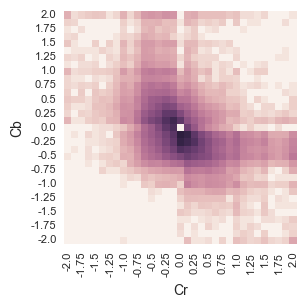

In [4]:
plot_pair_density(alpha_count, 'uv_alpha_raw_prob')
stats.pearsonr(alpha_count.ravel(), alpha_count.T.ravel())

In [5]:
alpha_norm = alpha_count.astype(float)
alpha_norm[:16,:16] /= alpha_norm[:16,:16].sum()
alpha_norm[17:,:16] /= alpha_norm[17:,:16].sum()
alpha_norm[:16,17:] /= alpha_norm[:16,17:].sum()
alpha_norm[17:,17:] /= alpha_norm[17:,17:].sum()
alpha_norm[:16,16] /= alpha_norm[:16,16].sum()
alpha_norm[17:,16] /= alpha_norm[17:,16].sum()
alpha_norm[16,:16] /= alpha_norm[16,:16].sum()
alpha_norm[16,17:] /= alpha_norm[16,17:].sum()
alpha_norm *= alpha_count.sum()

(0.98267623302158658, 0.0)

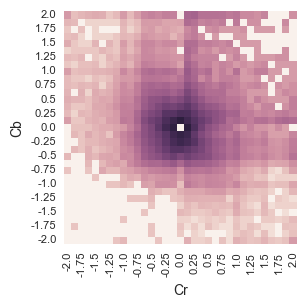

In [6]:
plot_pair_density(alpha_norm, 'uv_alpha_norm_prob')
stats.pearsonr(alpha_norm.ravel(), alpha_norm.T.ravel())

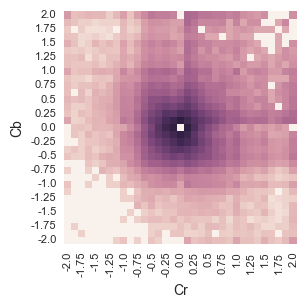

In [7]:
alpha_norm_symm = (alpha_norm + alpha_norm.T) * .5
plot_pair_density(alpha_norm_symm, 'uv_alpha_symm_prob');

(0.99901121782660285, 0.0)

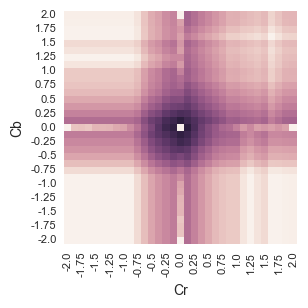

In [8]:
ones_16x16 = np.ones((16, 16))
t = alpha_norm_symm.copy()
for quadrant in [t[:16, :16], t[17:, :16], t[:16, 17:], t[17:, 17:]]:
    def cost_t(x):
        x = x.clip(1)
        v = (x[:16] * ones_16x16).T * x[16:]
        return ((quadrant - v)**2).sum()
    x0 = np.hstack((quadrant.mean(axis=1), quadrant.mean(axis=0)))
    x0 *= np.sqrt(quadrant.sum() / ((x0[:16] * ones_16x16).T * x0[16:]).sum())
    x0 = optimize.fmin(cost_t, x0, maxfun=100000, disp=False).clip(1)
    quadrant[:, :] = (x0[:16] * ones_16x16).T * x0[16:]
alpha_norm_symm_1d = (t + t.T) * .5
plot_pair_density(alpha_norm_symm_1d, 'uv_alpha_1d')
stats.pearsonr(alpha_norm_symm.ravel(), alpha_norm_symm_1d.ravel())

In [9]:
alpha_model = alpha_norm_symm_1d.copy()
alpha_model[:16,:16] *= alpha_count[:16,:16].sum() / alpha_norm[:16,:16].sum()
alpha_model[17:,:16] *= alpha_count[17:,:16].sum() / alpha_norm[17:,:16].sum()
alpha_model[:16,17:] *= alpha_count[:16,17:].sum() / alpha_norm[:16,17:].sum()
alpha_model[17:,17:] *= alpha_count[17:,17:].sum() / alpha_norm[17:,17:].sum()
alpha_model[:16,16] *= alpha_count[:16,16].sum() / alpha_norm[:16,16].sum()
alpha_model[17:,16] *= alpha_count[17:,16].sum() / alpha_norm[17:,16].sum()
alpha_model[16,:16] *= alpha_count[16,:16].sum() / alpha_norm[16,:16].sum()
alpha_model[16,17:] *= alpha_count[16,17:].sum() / alpha_norm[16,17:].sum()

(0.99197030286851651, 0.0)

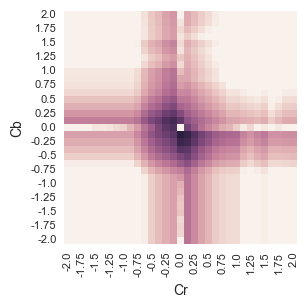

In [10]:
plot_pair_density(alpha_model, 'uv_alpha_model');
stats.pearsonr(alpha_count.ravel(), alpha_model.ravel())

In [11]:
raw_rate = np.sum(alpha_count*-np.log2(alpha_count.clip(1)/alpha_count.sum()))
model_rate = np.sum(alpha_count*-np.log2(alpha_model.clip(1)/alpha_model.sum()))
model_rate / raw_rate - 1

0.019743925400231399